In [82]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

X = train_df.drop(['prognosis'], axis=1)
y = train_df['prognosis']

# get the unique values in the 'prognosis' column as features
features = train_df['prognosis'].unique()

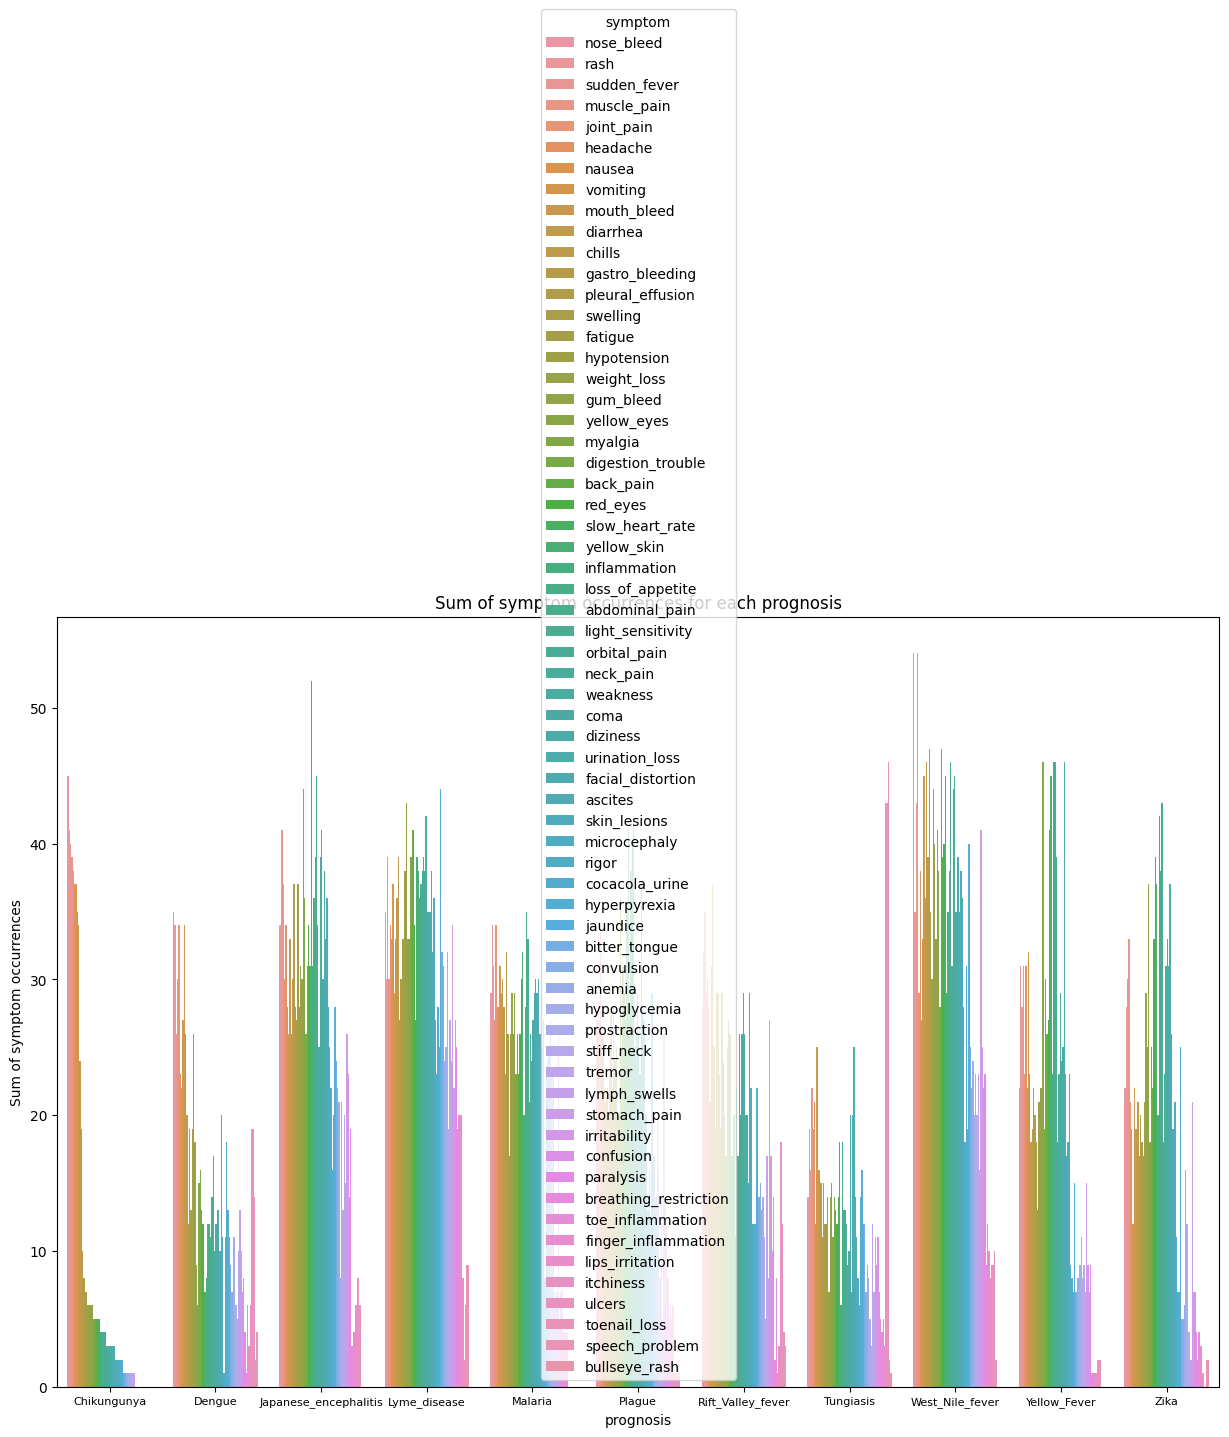

In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Group by 'prognosis' and sum the values of symptoms
summed_df = train_df.groupby('prognosis').sum()

# Reset index to have 'prognosis' as a column
summed_df.reset_index(inplace=True)
summed_df = summed_df.drop(columns=['id'])

# Calculate total sum of symptoms for each feature
summed_df['total_sum'] = summed_df.drop('prognosis', axis=1).sum(axis=1)

# Sort by total sum of symptoms
summed_df = summed_df.sort_values(by='total_sum', ascending=False)

# Melt the DataFrame to have 'prognosis', 'symptom', and 'value' columns
melted_df = pd.melt(summed_df, id_vars=['prognosis', 'total_sum'], var_name='symptom', value_name='value')

# Custom sorting function to sort by value within each prognosis
melted_df['rank'] = melted_df.groupby('prognosis')['value'].rank(ascending=False, method='first')
melted_df = melted_df.sort_values(['prognosis', 'rank'])

# Create a bar plot
plt.figure(figsize=(15, 10))
sns.barplot(data=melted_df, x='prognosis', y='value', hue='symptom')
plt.ylabel("Sum of symptom occurrences")
plt.title("Sum of symptom occurrences for each prognosis")

# Set x-axis font size
plt.xticks(fontsize=8)

plt.show()


In [99]:
X.shape

(707, 65)

In [100]:
y.shape

(707,)

In [110]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Load data
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

# Preprocessing
X = train_df.drop(['prognosis'], axis=1)
y = train_df['prognosis']

# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the number of splits for cross-validation
n_splits = 5

# Initialize the StratifiedKFold object
kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize the lists to store the evaluation metrics for each fold
val_losses = []
val_accuracies = []

# Iterate through the cross-validation splits
for train_index, val_index in kfold.split(X_scaled, y_encoded):
    X_train, X_val = X_scaled[train_index], X_scaled[val_index]
    y_train, y_val = y_encoded[train_index], y_encoded[val_index]

    # Build the neural network model
    model = Sequential([
        Dense(64, activation='relu', input_shape=(num_features,)),
        Dense(32, activation='relu'),
        Dense(8, activation='relu'),
        Dense(32, activation='relu'),
        Dense(num_labels, activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=64, verbose=0)

    # Save the evaluation metrics for this fold
    val_losses.append(history.history['val_loss'][-1])
    val_accuracies.append(history.history['val_accuracy'][-1])

# Calculate the average evaluation metrics across all folds
avg_val_loss = np.mean(val_losses)
avg_val_accuracy = np.mean(val_accuracies)

print(f"Average validation loss: {avg_val_loss:.4f}")
print(f"Average validation accuracy: {avg_val_accuracy:.4f}")


Average validation loss: 2.4247
Average validation accuracy: 0.2743


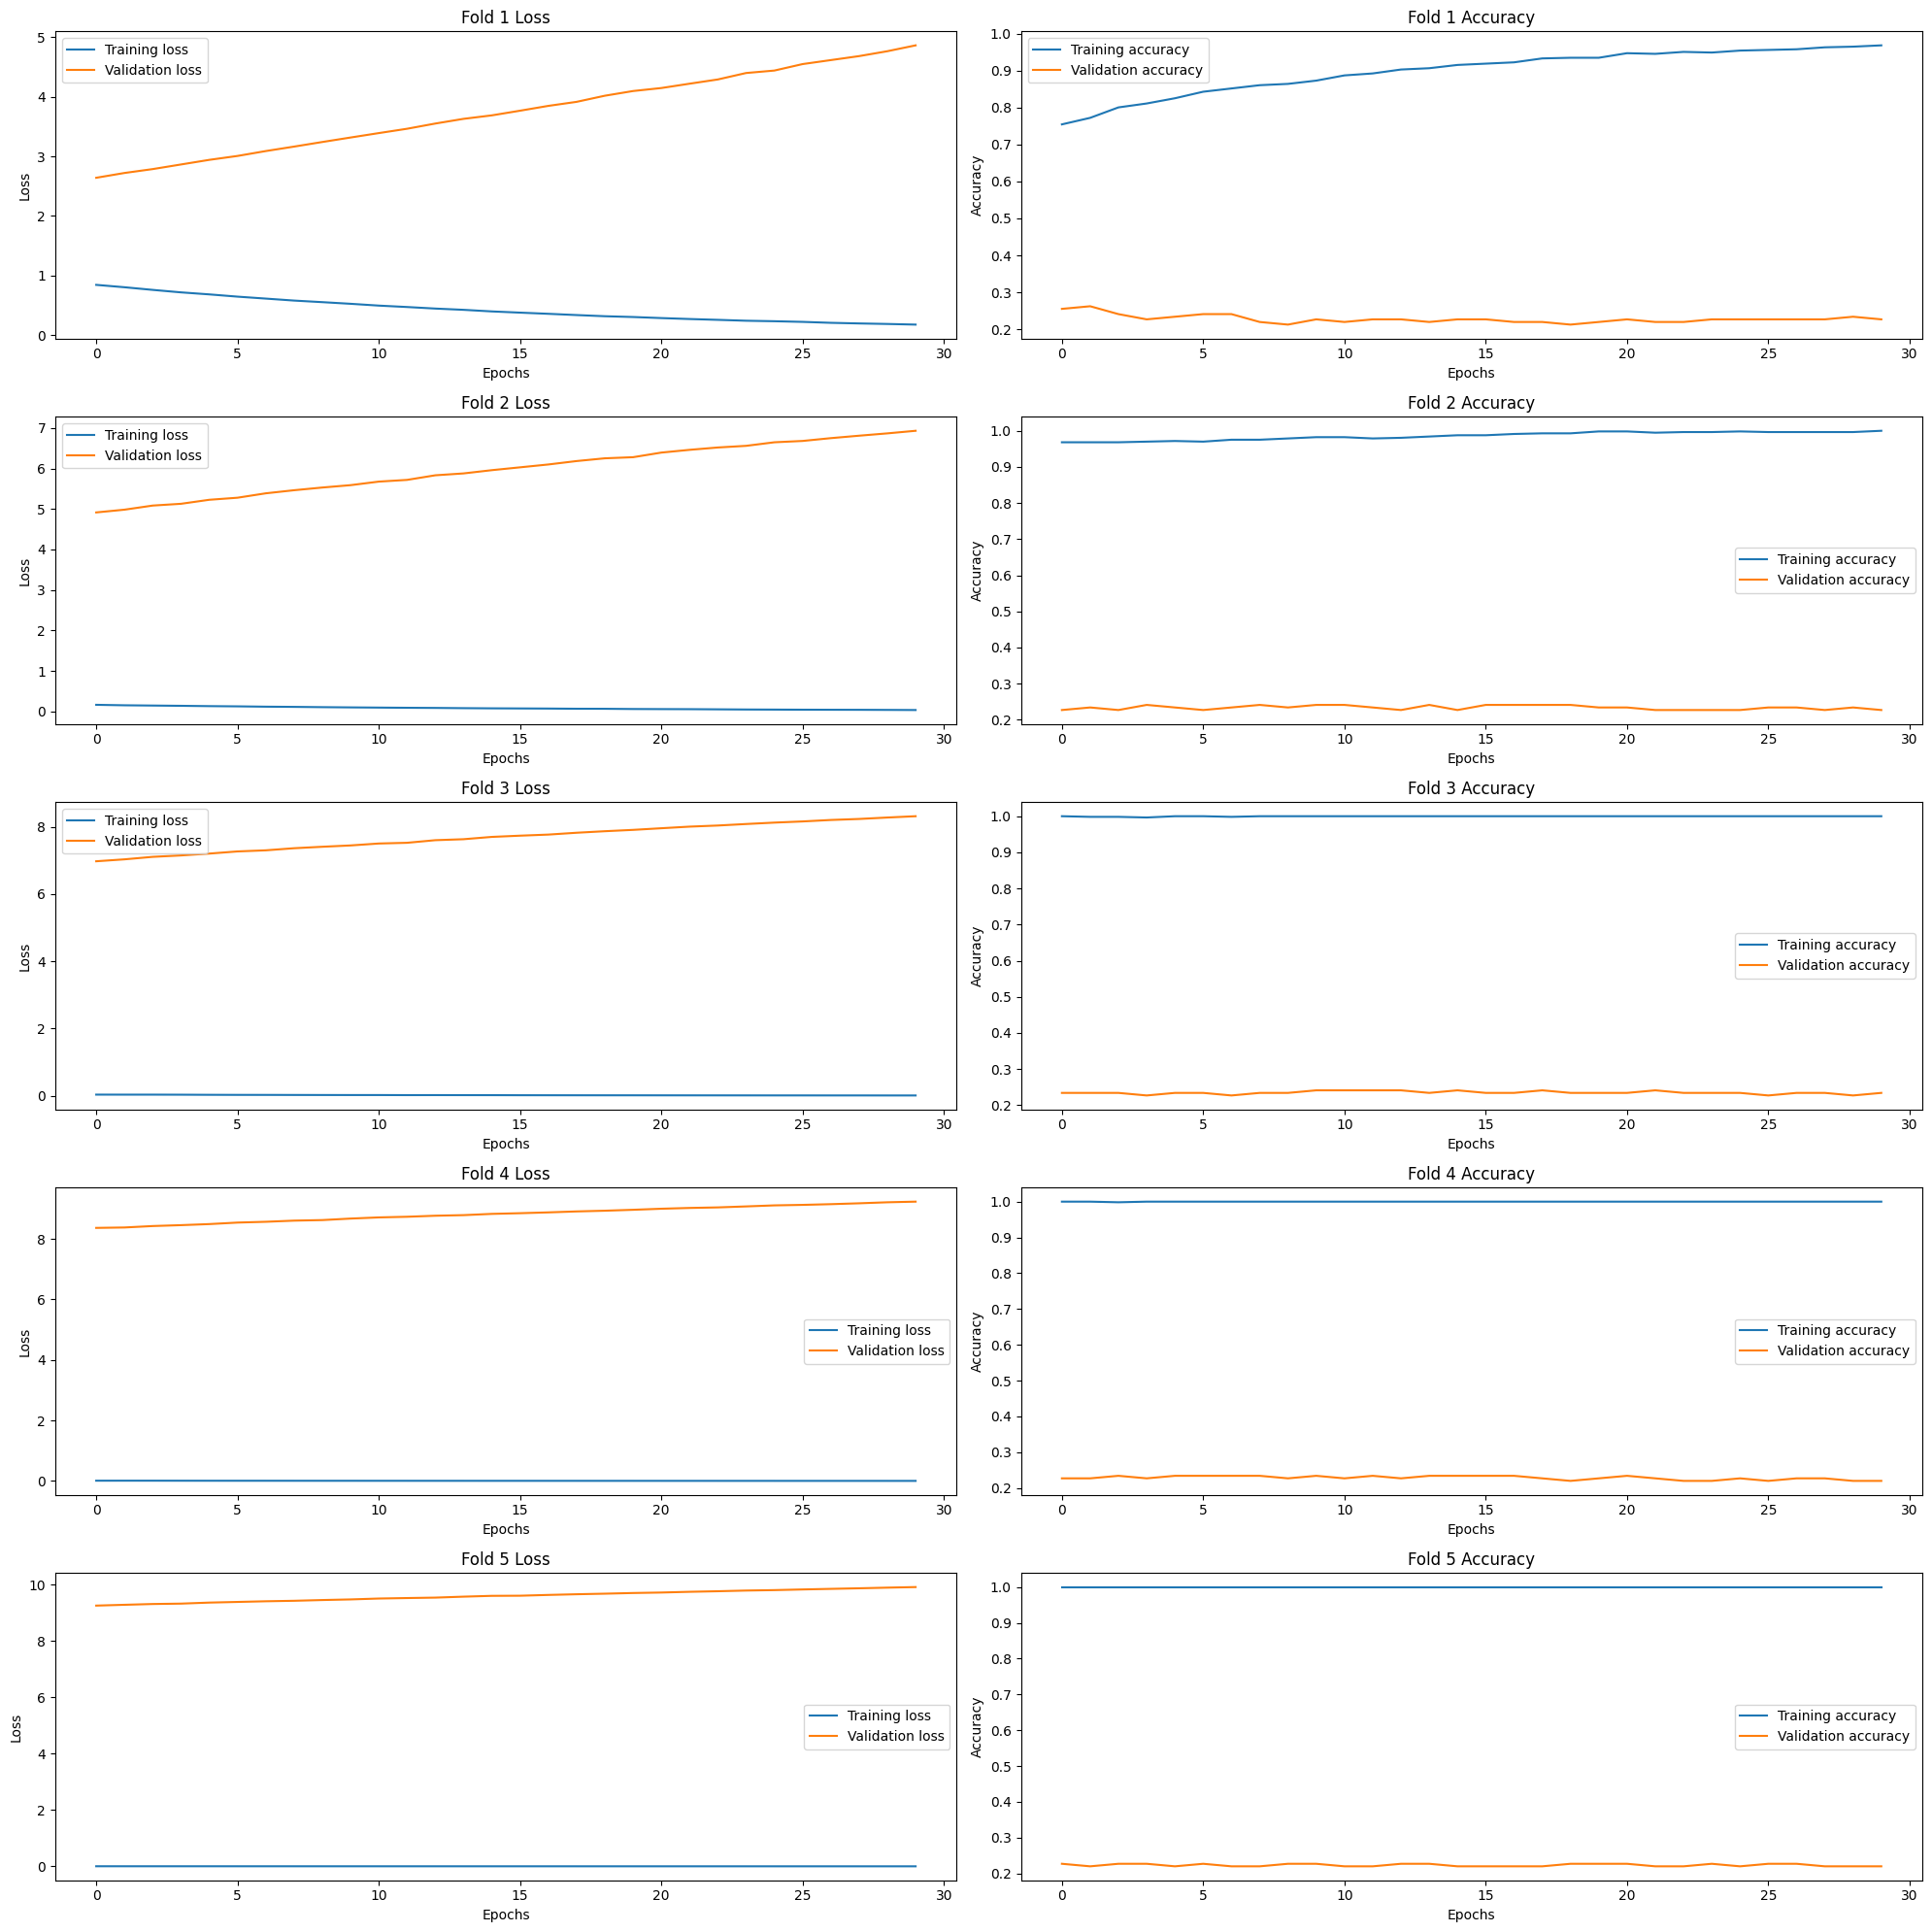

In [113]:
# Initialize lists to store the training and validation loss and accuracy for each fold
all_training_losses = []
all_training_accuracies = []
all_validation_losses = []
all_validation_accuracies = []

# Iterate through the cross-validation splits
for train_index, val_index in kfold.split(X_scaled, y_encoded):
    # ... (same code as before)

    # Train the model
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=64, verbose=0)

    # Save the evaluation metrics for this fold
    all_training_losses.append(history.history['loss'])
    all_training_accuracies.append(history.history['accuracy'])
    all_validation_losses.append(history.history['val_loss'])
    all_validation_accuracies.append(history.history['val_accuracy'])

# Calculate the average evaluation metrics across all folds
avg_val_loss = np.mean(val_losses)
avg_val_accuracy = np.mean(val_accuracies)

# Plot the training and validation loss and accuracy for each fold
num_folds = len(all_training_losses)
plt.figure(figsize=(20, 4 * num_folds))

for i in range(num_folds):
    # Plot the training and validation loss
    plt.subplot(num_folds, 2, i * 2 + 1)
    plt.plot(all_training_losses[i], label='Training loss')
    plt.plot(all_validation_losses[i], label='Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Fold {i + 1} Loss')
    plt.legend()

    # Plot the training and validation accuracy
    plt.subplot(num_folds, 2, i * 2 + 2)
    plt.plot(all_training_accuracies[i], label='Training accuracy')
    plt.plot(all_validation_accuracies[i], label='Validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Fold {i + 1} Accuracy')
    plt.legend()

plt.tight_layout()
plt.show()


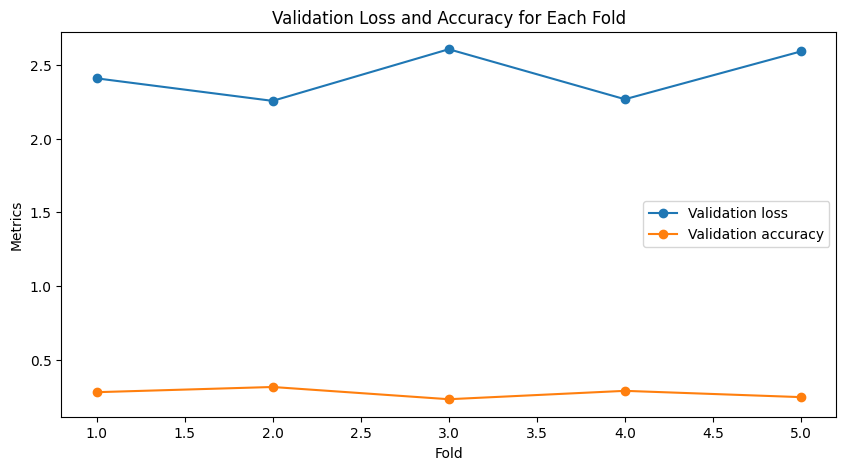

In [112]:
import matplotlib.pyplot as plt

# Create the x-axis values (fold numbers)
folds = list(range(1, n_splits + 1))

# Plot the validation losses and accuracies for each fold
plt.figure(figsize=(10, 5))
plt.plot(folds, val_losses, marker='o', label='Validation loss')
plt.plot(folds, val_accuracies, marker='o', label='Validation accuracy')

# Add labels, title, and legend
plt.xlabel('Fold')
plt.ylabel('Metrics')
plt.title('Validation Loss and Accuracy for Each Fold')
plt.legend()

# Display the plot
plt.show()


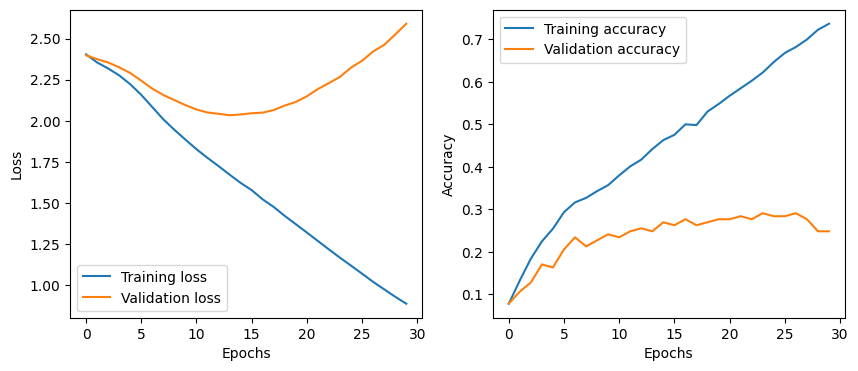

In [111]:
import matplotlib.pyplot as plt

# Extract the history data
training_loss = history.history['loss']
training_accuracy = history.history['accuracy']
validation_loss = history.history['val_loss']
validation_accuracy = history.history['val_accuracy']

# Plot the training and validation loss
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training loss')
plt.plot(validation_loss, label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Training accuracy')
plt.plot(validation_accuracy, label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
